**Assignment 2: Evaluating Regression Models**

Group 3: Laura Fanelli, Mark Schieble, John Vaughan, Katie Zink

## Data Preparation, Exploration & Visualization

In [ ]:
#import packages  
import pandas as pd
import numpy as np
#pip install altair vega_datasets
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.impute import SimpleImputer
%matplotlib inline
 


In [ ]:
#lets take a look at the data
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
#Ensure that the test data is similar to the training set 
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
#the data ID will be used by Keggle to scare the final submission. To retain the ID, we will set the ID as the index
df_test = df_test.set_index('Id') # Set ID as index on the test data 

df_train = df_train.set_index('Id') # Set ID as index on the training data 

In [ ]:
#lets see the types of data we are working with
# df_train.info()

In [ ]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
#Here we see categorical variables 
df_train.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


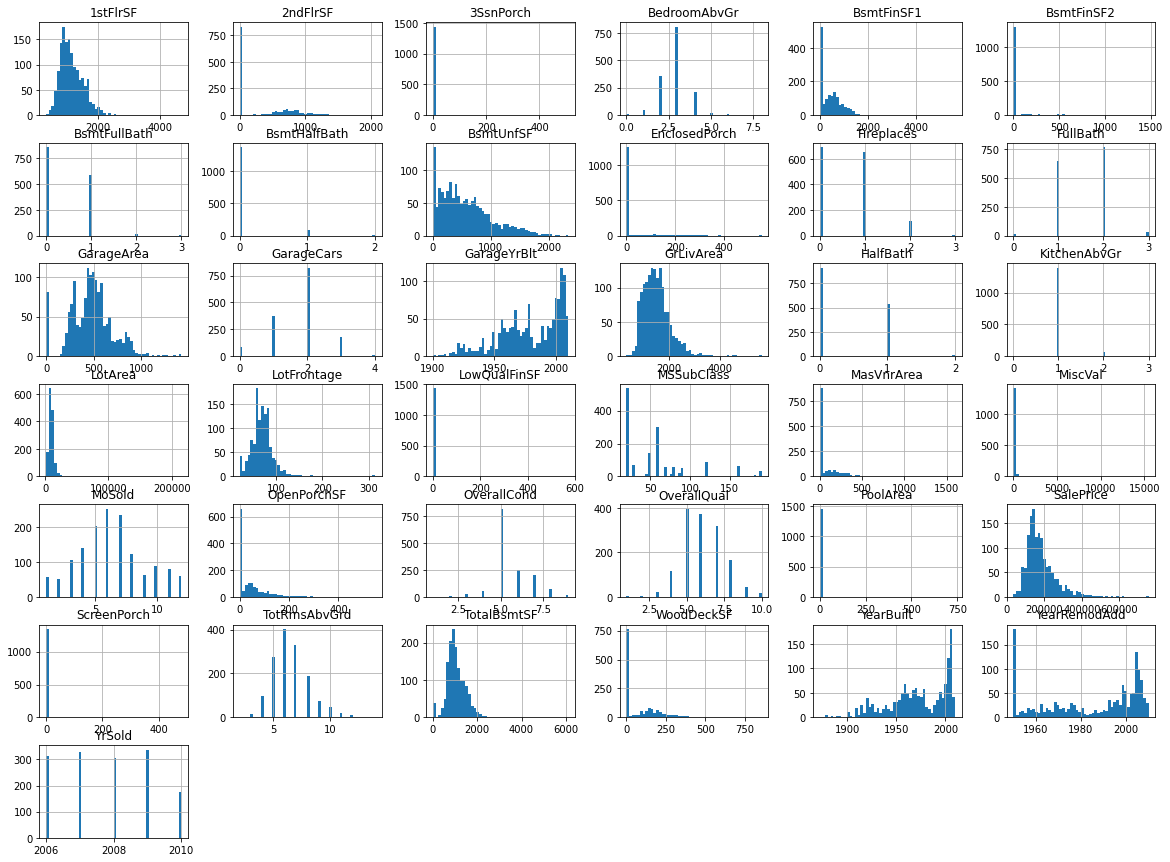

In [ ]:
#histogram of each numerical attribute
%matplotlib inline 
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#feature creation - Total Floor SF
df_train['TotalFloorSF']=df_train['1stFlrSF']+df_train['2ndFlrSF']
df_test['TotalFloorSF']=df_test['1stFlrSF']+df_test['2ndFlrSF']

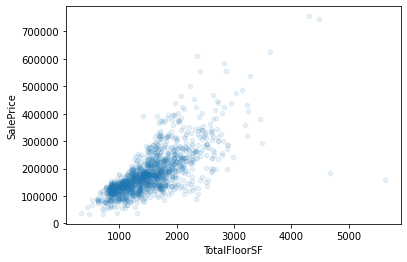

In [ ]:
#visual of our new feature
df_train.plot(kind="scatter", x="TotalFloorSF", y="SalePrice",
alpha=0.1)

In [ ]:
#feature creation - Quality Index
df_train['QualityIndex']=df_train['OverallQual']*df_train['OverallCond']
df_test['QualityIndex']=df_test['OverallQual']*df_test['OverallCond']

NameError: ignored

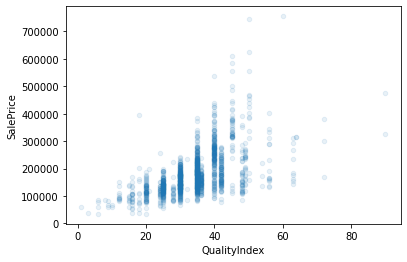

In [ ]:
#visual of our new feature
df_train.plot(kind="scatter", x="QualityIndex", y="SalePrice",
alpha=0.1)

Correct Nulls with most frequent


In [ ]:
#fill_NaN = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#df_train = pd.DataFrame(fill_NaN.fit_transform(df_train))
#df_train.columns = df_train.columns
#df_train.index = df_train.index

In [ ]:
#correct lot area nas with median
#lotarea_imr=SimpleImputer(missing_values=np.nan, strategy='median')
#lotarea_imr.fit(df_test.LotArea.values.reshape(-1,1))
#df_test['LotArea']=lotarea_imr.transform(df_test.LotArea.values.reshape(-1,1))

Correcting Categorical variables with numerical values

In [ ]:
# To fix the large number of catagorical variables, we can use SKlearn's label encoder. 
#This takes each catagory and replaces it with a numerical reference. This enables the Algorithm to read the data easier.
def encode_cat_var(df):
    from sklearn.preprocessing import LabelEncoder
    Label_Encoder = LabelEncoder()
    cat_list = df.select_dtypes(include=['object']).columns.tolist()
    for column in cat_list:
        df[column] = Label_Encoder.fit_transform(df[column].astype('str'))
    return df

In [ ]:
df_train = encode_cat_var(df_train) #apply to train
df_test = encode_cat_var(df_test) #apply to test

In [ ]:
#correlation between each attribute and our response variable SalePrice
#corr_matrix = df_train.corr()
#corr_matrix["SalePrice"].sort_values(ascending=False)

In [ ]:
#columns_to_drop = ['PoolQC', 'MiscFeature', 'Fence', 'Alley','LotFrontage','GarageYrBlt','MasVnrArea'] 

In [ ]:
#df_train = df_train.drop(columns_to_drop, 1)
#df_test = df_test.drop(columns_to_drop, 1)

In [ ]:
# function to fill missing values from list. Note, this was retired in the final version of the notebook
column_list = ['GarageCars']
def fill_missing_values(column_list, df):
    for column in column_list:
        df[column] = df[column].fillna(value=0,inplace=True)
    return df

In [ ]:
#clean dataframe function
def clean_df(df):
    assert isinstance(df, pd.DataFrame)
    df.fillna(value=0,inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df_train = clean_df(df_train) #apply to train
df_test = clean_df(df_test) #apply to test

In [ ]:
#df_train = fill_missing_values(column_list, df_train) #apply to train
#df_test = fill_missing_values(column_list, df_test) #apply to test

## Review research design and modeling methods

In [ ]:
#split the data into a test and train datasets. SalePrice is the y variable. 
from sklearn.model_selection import train_test_split

X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice'].values
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [ ]:
#standardize the numerical variables here for use in the lasso and ridge regression 
#X_train['LotAreaScaled'] = minmax_scale(X_train.LotArea)

#X_train.plot(x='LotArea', y= 'Neighborhood', kind='scatter')
#X_train.plot(x='LotAreaScaled', y='Neighborhood', kind= 'scatter')

#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#df_test = sc_X.transform(df_test)



In [ ]:
#To Refine the model, we can adjust the number of features used. However, in adjusting, we only want the most important features.
#We can use a lasso model to rank features, and take only the variables most likely to predict sale price
from sklearn.linear_model import Lasso
  
model = Lasso(alpha=0.01)
model.fit(X_train,y_train)

feature_importance_test = pd.DataFrame(data=model.coef_,
                                       columns=['feature_importance'], 
                                       index = X_train.columns).sort_values(by='feature_importance', 
                                                                            ascending=False)

feature_importance_test = feature_importance_test[feature_importance_test['feature_importance'] != 0] #Note, this can be change to greater or less than 
feature_importance_test.index.to_list()[:30] # unhide to see top features 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15307814436.866821, tolerance: 698757295.8078624
  positive)


['Street',
 'GarageCars',
 'BsmtFullBath',
 'RoofMatl',
 'BsmtHalfBath',
 'OverallQual',
 'FullBath',
 'Alley',
 'TotRmsAbvGrd',
 'Functional',
 'LandSlope',
 'LandContour',
 'SaleCondition',
 'Foundation',
 'MasVnrType',
 'BsmtCond',
 'RoofStyle',
 'PavedDrive',
 'CentralAir',
 'HalfBath',
 'MiscFeature',
 'GarageFinish',
 'GarageCond',
 'Fireplaces',
 'QualityIndex',
 'Exterior2nd',
 'GarageType',
 'ExterCond',
 'LotConfig',
 'Fence']

In [ ]:
#Change the the value as needed - this will directly impact the model features. 
top_features = feature_importance_test.index.to_list()[:30] 

#original syntax failed for me -- had to convert to list this way 
#top_features = feature_importance_test
#top_features = top_features.index.tolist()
# top_features

In [ ]:
X = df_train[top_features] #Filter out all non top features
print(X)

      Street  GarageCars  BsmtFullBath  ...  ExterCond  LotConfig  Fence
Id                                      ...                             
1        1.0         2.0           1.0  ...        4.0        4.0    4.0
2        1.0         2.0           0.0  ...        4.0        2.0    4.0
3        1.0         2.0           1.0  ...        4.0        4.0    4.0
4        1.0         3.0           1.0  ...        4.0        0.0    4.0
5        1.0         3.0           1.0  ...        4.0        2.0    4.0
...      ...         ...           ...  ...        ...        ...    ...
1456     1.0         2.0           0.0  ...        4.0        4.0    4.0
1457     1.0         2.0           1.0  ...        4.0        4.0    2.0
1458     1.0         1.0           0.0  ...        2.0        4.0    0.0
1459     1.0         1.0           1.0  ...        4.0        4.0    4.0
1460     1.0         1.0           1.0  ...        4.0        4.0    4.0

[1460 rows x 30 columns]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Street         1460 non-null   float64
 1   GarageCars     1460 non-null   float64
 2   BsmtFullBath   1460 non-null   float64
 3   RoofMatl       1460 non-null   float64
 4   BsmtHalfBath   1460 non-null   float64
 5   OverallQual    1460 non-null   float64
 6   FullBath       1460 non-null   float64
 7   Alley          1460 non-null   float64
 8   TotRmsAbvGrd   1460 non-null   float64
 9   Functional     1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  LandContour    1460 non-null   float64
 12  SaleCondition  1460 non-null   float64
 13  Foundation     1460 non-null   float64
 14  MasVnrType     1460 non-null   float64
 15  BsmtCond       1460 non-null   float64
 16  RoofStyle      1460 non-null   float64
 17  PavedDrive     1460 non-null   float64
 18  CentralA

In [ ]:
#random number generator - to generate the same shuffled indices 
np.random.seed(42)

In [ ]:
#test train split for the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Build metrics to evaluate model performance - We will use RSME and R2 Suared 
from sklearn import metrics

def model_evaluation(true, predicted):  
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

## Review Results & Evaluate Models

In [ ]:
#Linear Regression 

from sklearn.linear_model import LinearRegression

print('Linear Regression Model')

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

model_evaluation(y_test, pred)


Linear Regression Model
RMSE: 40928.539452586156
R2 Square 0.7599422708965702


In [ ]:
#Ridge  
from sklearn.linear_model import Ridge

print('Ridge Regression Model')

model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)
pred = model_Ridge.predict(X_test)

model_evaluation(y_test, pred)

Ridge Regression Model
RMSE: 40906.184590319244
R2 Square 0.7602044347549681


In [ ]:
#Lasso
from sklearn.linear_model import Lasso
print('Lasso Model')

model_Lasso = Lasso()
model_Lasso.fit(X_train, y_train)
pred = model_Lasso.predict(X_test)

model_evaluation(y_test, pred)

Lasso Model
RMSE: 40928.17664182296
R2 Square 0.7599465268579626


In [ ]:
#Elastic Net
from sklearn.linear_model import ElasticNet

print('Elastic Net Model')

model_ElasticNet = ElasticNet()
model_ElasticNet.fit(X_train, y_train)
pred = model_ElasticNet.predict(X_test)

model_evaluation(y_test, pred)

Elastic Net Model
RMSE: 42466.72520863083
R2 Square 0.7415593983502728


In [ ]:
#to test a different typer of algorithm we can run a random forest regressor

from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor()

model_RandomForestRegressor.fit(X_train, y_train)
pred = model_RandomForestRegressor.predict(X_test)

model_evaluation(y_test, pred)

RMSE: 33366.774143877745
R2 Square 0.8404518977660336


In [ ]:
#Use the test data to make prediction 

test_model_prediction = model_RandomForestRegressor.predict(df_test[top_features])

test_prediction = pd.DataFrame()

test_prediction['ID'] = df_test.index

test_prediction['SalePrice'] = test_model_prediction

In [ ]:
#save file for kaggle upload
test_prediction.to_csv('submission_test.csv', index = False)